In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

In [4]:
# from sklearn.datasets import fetch_openml
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# mnist = fetch_mldata('MNIST original',data_home = "./datasets/")
mnist =fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape , y.shape

((70000, 784), (70000,))

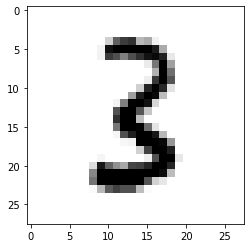

In [7]:
#先来看一下数据集，使用matplotlib进行可视化，这里要理解把向量转化成矩阵才能显示
import matplotlib
import matplotlib.pyplot as plt#可视化包

digitshow = X[50000]#第50000个实例,样本
digitshow= digitshow.reshape(28, 28)#同reshape函数转化
plt.imshow(digitshow, cmap = matplotlib.cm.binary,interpolation="nearest")#传入图片，颜色，位置
plt.show()

In [8]:
from sklearn.neural_network import MLPClassifier#导入多层感知器分类机BP网络
X[50000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  47., 160., 195., 205.,  71.,  86.,  13.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  12., 23

In [9]:
#数据归一化
X = X / 255
#  划分数据集也可以用我们之前用的train_test_split函数
##切片的形式
X_train, X_test = X[:60000], X[60000:]#选取前六万张作为训练集
y_train, y_test = y[:60000], y[60000:]#后一万张作为测试集

mlp = MLPClassifier(hidden_layer_sizes=(50,), activation="logistic",max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=0.1)
mlp.fit(X_train, y_train)#模型的训练
print("Training set score: %f" % mlp.score(X_train, y_train))#对训练集评分
print("Test set score: %f" % mlp.score(X_test, y_test))#训练好的模型对测试集评分

Iteration 1, loss = 0.58132465
Iteration 2, loss = 0.25927483
Iteration 3, loss = 0.21084570
Iteration 4, loss = 0.17950237
Iteration 5, loss = 0.15763433
Iteration 6, loss = 0.14065897
Iteration 7, loss = 0.12714638
Iteration 8, loss = 0.11677640
Iteration 9, loss = 0.10820911
Iteration 10, loss = 0.10090813


/Users/didi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.974600
Test set score: 0.967600


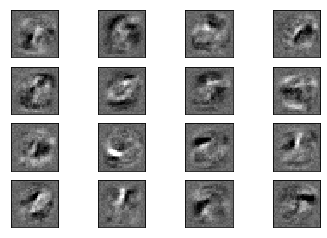

In [10]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [11]:
mlp.n_layers_

3